<a href="https://colab.research.google.com/github/FunmiSomoye-schl/fake_news/blob/main/Somoye_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installations and Importations

### Installations

In [2]:
!pip install lingua-language-detector
!python -m spacy download en_core_web_lg
!pip install contractions
!pip install textblob
!pip install pyspellchecker
!pip install contextualSpellCheck

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.1/128.1 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

###Libraries

In [3]:
import re
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from lingua import Language, LanguageDetectorBuilder
import contractions
from spellchecker import SpellChecker
import contextualSpellCheck
import spacy
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

## Xlsx to Csv

In [10]:
df = pd.read_excel('scored_posts.xlsx')
df.head()

,domain,subreddit,title,description,url,reddit_link,trustworthiness
0,21stcenturywire.com,antiwar,No2Nato No2War â€“ The Truth About Ukraine and...,NaN,https://21stcenturywire.com/2023/09/29/no2nato...,/r/antiwar/comments/16vxxjz/no2nato_no2war_the...,0.207914
1,21stcenturywire.com,EndlessWar,INTERVIEW: Joaquin Flores - 'Inside Ukraine's ...,NaN,https://21stcenturywire.com/2023/06/19/intervi...,/r/EndlessWar/comments/14eoth1/interview_joaqu...,0.207914
2,21stcenturywire.com,trump,FBI Director Comey was board member of HSBC â€...,NaN,https://21stcenturywire.com/2016/07/13/fbi-dir...,/r/trump/comments/1482psx/fbi_director_comey_w...,0.207914
3,21stcenturywire.com,Wallstreetsilver,RIP ENGLAND,â€œMoney For Nothing: Universal Basic Income t...,https://21stcenturywire.com/2023/06/06/money-f...,/r/Wallstreetsilver/comments/142zg65/rip_england/,0.207914
4,21stcenturywire.com,WayOfTheBern,McKinsey in France: The 'Pro-Bono Scandal' is ...,NaN,https://21stcenturywire.com/2023/04/27/mckinse...,/r/WayOfTheBern/comments/1330o08/mckinsey_in_f...,0.207914


In [11]:
df['trustworthiness'] = np.where(df['trustworthiness'] > 0.3, 1, 0)

In [12]:
df.to_csv('scored_posts_0.3.csv')

In [14]:
del df

##Data

In [13]:
data = pd.read_csv('scored_posts_0.3.csv', index_col=0)
data.head()

,domain,subreddit,title,description,url,reddit_link,trustworthiness
0,21stcenturywire.com,antiwar,No2Nato No2War â€“ The Truth About Ukraine and...,NaN,https://21stcenturywire.com/2023/09/29/no2nato...,/r/antiwar/comments/16vxxjz/no2nato_no2war_the...,0
1,21stcenturywire.com,EndlessWar,INTERVIEW: Joaquin Flores - 'Inside Ukraine's ...,NaN,https://21stcenturywire.com/2023/06/19/intervi...,/r/EndlessWar/comments/14eoth1/interview_joaqu...,0
2,21stcenturywire.com,trump,FBI Director Comey was board member of HSBC â€...,NaN,https://21stcenturywire.com/2016/07/13/fbi-dir...,/r/trump/comments/1482psx/fbi_director_comey_w...,0
3,21stcenturywire.com,Wallstreetsilver,RIP ENGLAND,â€œMoney For Nothing: Universal Basic Income t...,https://21stcenturywire.com/2023/06/06/money-f...,/r/Wallstreetsilver/comments/142zg65/rip_england/,0
4,21stcenturywire.com,WayOfTheBern,McKinsey in France: The 'Pro-Bono Scandal' is ...,NaN,https://21stcenturywire.com/2023/04/27/mckinse...,/r/WayOfTheBern/comments/1330o08/mckinsey_in_f...,0


In [15]:
data.shape

(258103, 7)

There are 258103 rows and 7 columns in the main dataset.

In [16]:
#check for duplicates
data[data.duplicated(keep=False)]

,domain,subreddit,title,description,url,reddit_link,trustworthiness


In [17]:
data['trustworthiness'].value_counts(normalize=True)

trustworthiness
1    0.960485
0    0.039515
Name: proportion, dtype: float64

We have a serious case of data imbalance

###Train Test Val Splits

In [18]:
train_test_rndm = 42
train_val_rndm = 24
test_ratio = 0.2
target = 'trustworthiness'

In [19]:
def classification_df_split(df, test_ratio, rndm, y, shuffle=False, stratify=False):
    tr_df, test_df = train_test_split(df, test_size=test_ratio, random_state=rndm, shuffle=shuffle, stratify=stratify)
    print('train:', tr_df.shape)
    print('test:', test_df.shape)
    print('')

    print('train target balance: ', tr_df[y].value_counts(normalize=True))
    print('')
    print('test target balance: ', test_df[y].value_counts(normalize=True))

    return tr_df, test_df

*Train Test*

In [20]:
main_train, test_df = classification_df_split(data, test_ratio, train_test_rndm, target, shuffle=True, stratify=data[target])

train: (206482, 7)
test: (51621, 7)

train target balance:  trustworthiness
1    0.960486
0    0.039514
Name: proportion, dtype: float64

test target balance:  trustworthiness
1    0.960481
0    0.039519
Name: proportion, dtype: float64


After the train_test split, there are 206,482 rows for the training data, 51,621 rows in the test data.

*Train Val*

In [21]:
train_df, val_df = classification_df_split(main_train, test_ratio, train_val_rndm, target, shuffle=True, stratify=main_train[target])

train: (165185, 7)
test: (41297, 7)

train target balance:  trustworthiness
1    0.960487
0    0.039513
Name: proportion, dtype: float64

test target balance:  trustworthiness
1    0.960481
0    0.039519
Name: proportion, dtype: float64


After the train val split, there are 165,185 rows for the training data, 41,297 rows in the validation data.

In [ ]:
del main_train, data, test_df, val_df

# Exploratory Data Analysis

In [ ]:
# train_df = pd.read_csv('train_df.csv').set_index(keys='index')

In [22]:
train_df.head()

,domain,subreddit,title,description,url,reddit_link,trustworthiness
63829,thequint.com,bjpmeme,Don't Be Fooled... Violence Against Kuki Women...,NaN,https://www.thequint.com/opinion/manipur-kuki-...,/r/bjpmeme/comments/154o15f/dont_be_fooled_vio...,1
127845,sheknows.com,DlistedRoyals,Bower says that titles shouldnâ€™t have been g...,I still find it odd that that was announced to...,https://www.sheknows.com/parenting/articles/28...,/r/DlistedRoyals/comments/16xt5ja/bower_says_t...,1
4488,amgreatness.com,Conservative,Biden Regime Gives Christian Family That Fled ...,NaN,https://amgreatness.com/2023/09/25/biden-regim...,/r/Conservative/comments/16sojwr/biden_regime_...,1
138672,abc11.com,raleigh,Do you agree Raleigh has 3rd best water in the...,NaN,https://abc11.com/raleigh-north-carolina-water...,/r/raleigh/comments/14naal4/do_you_agree_ralei...,1
23992,usasupreme.com,conspiracy,The Police Breached The House Of Maine's Shoot...,NaN,https://www.usasupreme.com/the-police-breached...,/r/conspiracy/comments/17hl5l0/the_police_brea...,0


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165185 entries, 63829 to 1651
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   domain           165185 non-null  object
 1   subreddit        165185 non-null  object
 2   title            165182 non-null  object
 3   description      7821 non-null    object
 4   url              165185 non-null  object
 5   reddit_link      165185 non-null  object
 6   trustworthiness  165185 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 10.1+ MB


All columns except the target are string columns.

title and description both have missing values, but the description column has too many missing values obviously greater than half of the data at first glance

In [24]:
train_df['domain'].nunique()

3437

Compared to the number of rows in the dataset, the posts come from / reference a small number of domains

In [25]:
train_df['subreddit'].nunique()

13789

The posts in the dataset come from 13,789 subreddit groups compared to approx. 3,125,000 that exist today on reddit

In [26]:
# word counts and title length
train_df['word_count'] = train_df['title'].apply(lambda x: len(str(x).split()))
train_df['title_len'] = train_df['title'].apply(lambda x: len(str(x)))

Text(0.5, 1.0, 'Top 10 Title Word Count Distribution')

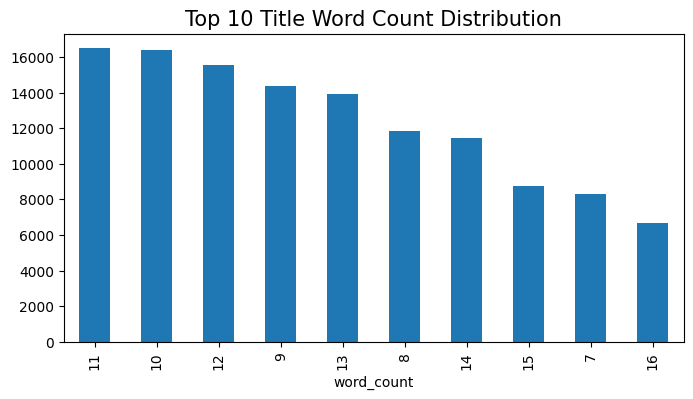

In [27]:
fig = plt.figure(figsize=(8, 4))
train_df.word_count.value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Title Word Count Distribution', size=15)

<Figure size 1000x500 with 0 Axes>

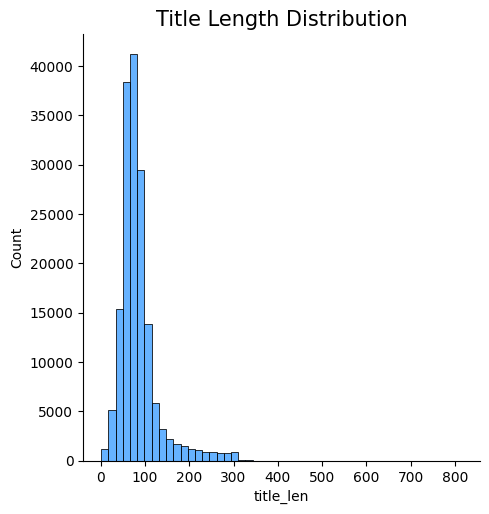

<Figure size 1000x500 with 0 Axes>

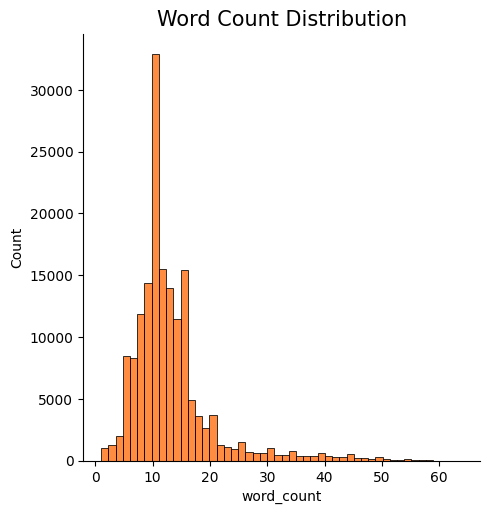

In [28]:
features = ['title_len', 'word_count']
titles = ['Title Length Distribution', 'Word Count Distribution']
colors = ['#3399ff', '#ff6600']

for feature, title, color in zip(features, titles, colors):
    fig = plt.figure(figsize=(10, 5))
    sns.displot(x=train_df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()
    print('')

## Missing Data

In [29]:
# drop description column
missingness_drop = ['description']

*title column has 2 missing rows. Since we have more than enough data to work with, we would drop those rows*

In [30]:
train_df.dropna(subset=['title'], inplace=True)

It is obvious that the title column is linked to both the url and reddit_link columns. Thus, we should be able to fill in the missing values through those columns.

*We would also be dropping the url and reddit_link columns as the important parts of their contents are already present in the other columns.*

In [31]:
non_ml_drop = ['url', 'reddit_link']

In [32]:
drop_cols = missingness_drop + non_ml_drop

In [33]:
train_df = train_df.drop(columns=drop_cols)

## Text Cleaning

*Since we are dealing with social media data, we would start by removing all unnecessary characters from the data.*

*Our main focus will be the title column.*

### *Title*

There are some patterns very common to reddit posts. We would check for presence of them first

*Don't bother with 'UPDATE' posts since no way to trace original posts and ddoes not provide added information.*

*Check for mentions*

In [34]:
train_df[train_df['title'].str.contains('@')].head()

,domain,subreddit,title,trustworthiness,word_count,title_len
56666,teenvogue.com,lesserafim,230815 Huh Yunjin - LE SSERAFIM's Huh Yunjin o...,1,26,138
5338,pagesix.com,taylorandtravis,TK @Eagles game,1,3,15
38739,coindesk.com,WOO_X,WOO founder Jack Tan on @coindesk markets. Jac...,1,34,209
153822,koco.com,oklahoma,Oklahoma lawmaker: DEI programs are 'horses#@!â€™,1,6,49
146585,rochesterfirst.com,Rochester,Be Kind Festival Spotlight - join us on Saturd...,1,20,109


This little snippet above also shows that the dataset is majorly made up of posts in english, and then a few in other languages

*Check for urls*

In [35]:
train_df[train_df['title'].str.contains('http')].head()

,domain,subreddit,title,trustworthiness,word_count,title_len
7784,mintpressnews.com,YourselfYou,https://www.mintpressnews.com/bellingcat-intel...,1,1,200
54483,missingkids.org,MissingPersons,https://www.missingkids.org/poster/USVA/VA23-2...,1,1,58
8655,infowars.com,allaboutconspiracies,Wild: Pfizer Director ASSAULTS James Oâ€™Keefe...,0,14,231
41990,afp.com,noturmomsnews,#UPDATE Howling gales and crashing waves pound...,1,32,251
21861,mercola.com,NurembergTwo,https://articles.mercola.com/sites/articles/ar...,0,16,188


*Check for common contractions*

In [36]:
train_df[train_df['title'].str.contains("aren't")].head()

,domain,subreddit,title,trustworthiness,word_count,title_len
59359,notthebee.com,ConservativeMichigan,Gov. Gretchen Whitmer signs law banning marria...,1,26,165
78313,money.yahoo.com,wallstreetbets,Consumers aren't convinced inflation's easing....,1,13,88
76226,atlanticcouncil.org,ChinaNoCensorship,Chinaâ€™s 'crimes against humanity' targeting ...,1,16,122
233090,bradfordtoday.ca,Albertaleft,Many young Canadians think Canada is doomed: L...,1,23,137
215743,ksby.com,bayarea,why aren't more people angry about the solar tax?,1,9,49


Contractions exist

#### Clean

##### *Lower Case*

In [37]:
train_df['title'] = train_df['title'].apply(lambda x: x.lower())

##### *Expand Common Contractions*

In [38]:
train_df['title'] = train_df['title'].apply(lambda x: ' '.join([contractions.fix(expanded_word) for expanded_word in x.split()]))

##### *Remove All Unwanted Characters*

In [39]:
def mention_url_nonalpha(text):
    text = re.sub("@[^\s]+"," ", str(text))
    text = re.sub("http[^\s]+"," ", str(text))
    text = re.sub(r"[^A-Za-z ]+", " ", str(text))
    text = " ".join(text.split()) #remove extra spaces, tabs, and new lines
    return text

In [40]:
#remove unwanted characters
train_df['title'] = train_df['title'].map(mention_url_nonalpha)

We saw that we have some non English contents.

##### *Remove non-English contents*

In [41]:
lang_detector = LanguageDetectorBuilder.from_all_spoken_languages().build()

def detect_lang(text):
    """get language detection confidence level"""
    return round(lang_detector.compute_language_confidence(text, Language.ENGLISH), 3)

In [42]:
train_df['language'] = train_df.title.apply(detect_lang)

In [43]:
#investigate results to try to establish an acceptable threshold
train_df[train_df['language']<=0.092]

,domain,subreddit,title,trustworthiness,word_count,title_len,language
255786,bz-berlin.de,dezwo,columbiabad in neuk lln bespuckt terrorisiert ...,1,9,97,0.000
196329,italiaoggi.it,news_italia,caccia al supersconto sul web si pu risparmiare,1,8,50,0.006
19800,contropiano.org,politicaITA,a napoli un altro caso cospito,0,6,31,0.027
60080,theplayerstribune.com,ussoccer,for jack by giovanni reyna,1,6,28,0.053
68638,ndr.de,Rostock,ankerplatz f r matrosen aus aller welt die neu...,1,12,84,0.012
...,...,...,...,...,...,...,...
39138,kompas.com,indonesia,kronologi kerusuhan di dago bandung berawal da...,1,11,76,0.000
27382,nikkei.com,newsokur,,1,4,91,0.000
81953,ledauphine.com,Grenoble,seyssinet pariset le supermarch casino de la f...,1,10,83,0.054
46251,berliner-zeitung.de,berlin,bahnhof oranienburg gesperrt regionalz ge fall...,1,6,54,0.001


*We'll start by cleaning rows with English detection confidence level <0.092*

In [44]:
train_df.loc[train_df['language']<=0.092, 'language'] = np.NaN

*Investigate some more to select an acceptable threshold*

In [45]:
train_df[train_df['language']<=0.095]

,domain,subreddit,title,trustworthiness,word_count,title_len,language
214103,theweek.co.uk,ukpolitics,has populism had its day in the uk,1,8,35,0.093
40088,france24.com,FRANCE24auto,world kane nets hat trick as bayern thrash dar...,1,12,74,0.095
105190,arretsurimages.net,france,le service presse de totalenergies met les gaz...,1,19,104,0.095
18776,coasttocoastam.com,Zampano,watch drone films chupacabra in bolivia,0,6,41,0.093
202569,starexponent.com,knifeclub,a new way to edc,1,5,16,0.093
...,...,...,...,...,...,...,...
101777,manilatimes.net,Philippines,chot not worried on parks oftana pogoy,1,7,40,0.093
209239,nautil.us,hypeurls,your brain on emoji,1,4,19,0.093
219602,nakedcapitalism.com,communism,the arrest of comprador bourgeois igor kolomoysky,1,7,49,0.094
158848,tpr.org,Destiny,lol texas baby,1,3,16,0.094


In [46]:
train_df[train_df['language']<=0.097]

,domain,subreddit,title,trustworthiness,word_count,title_len,language
148083,yesmagazine.org,randomthings,random thing,1,2,12,0.096
124898,spin.com,citypop,the cool war city pop vs k pop spin,1,9,38,0.096
214103,theweek.co.uk,ukpolitics,has populism had its day in the uk,1,8,35,0.093
40088,france24.com,FRANCE24auto,world kane nets hat trick as bayern thrash dar...,1,12,74,0.095
105190,arretsurimages.net,france,le service presse de totalenergies met les gaz...,1,19,104,0.095
...,...,...,...,...,...,...,...
101777,manilatimes.net,Philippines,chot not worried on parks oftana pogoy,1,7,40,0.093
209239,nautil.us,hypeurls,your brain on emoji,1,4,19,0.093
219602,nakedcapitalism.com,communism,the arrest of comprador bourgeois igor kolomoysky,1,7,49,0.094
158848,tpr.org,Destiny,lol texas baby,1,3,16,0.094


In [47]:
# increase the threshold limit
train_df.loc[train_df['language']<=0.095, 'language'] = np.NaN

This looks good enough. We'll maintain 0.095

*Drop Nan rows*

In [49]:
train_df.dropna(subset=['language'], inplace=True)

In [50]:
train_df.shape

(147516, 7)

We now have 147,527 rows/records to work with.

##### *Spelling Corrections*

*Check misspelled words*

In [51]:
#remove short words
train_df['title'] = train_df['title'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

In [52]:
spell = SpellChecker()
train_df['misspelled'] = train_df['title'].apply(lambda x: spell.unknown(x.split()))

In [53]:
train_df.head(20)

,domain,subreddit,title,trustworthiness,word_count,title_len,language,misspelled
63829,thequint.com,bjpmeme,do not be fooled violence against kuki women i...,1,13,79,0.777,"{manipur, kuki}"
127845,sheknows.com,DlistedRoyals,bower says that titles shouldn have been give ...,1,11,64,0.897,"{sussex, shouldn}"
4488,amgreatness.com,Conservative,biden regime gives christian family that fled ...,1,15,98,0.805,{biden}
138672,abc11.com,raleigh,do you agree raleigh has rd best water in the ...,1,11,53,0.573,"{rd, raleigh}"
23992,usasupreme.com,conspiracy,the police breached the house of maine shooter...,0,30,171,1.000,"{fbi, maine}"
131245,knoxnews.com,CFB,billy napier could use hand with florida footb...,1,17,97,0.866,"{florida, heupel, napier, tennessee}"
171401,nextshark.com,CrimesAgainstAsians,asian man drugged robbed in colombia by woman ...,1,14,69,0.357,"{asian, app}"
231373,waow.com,StevensPoint,demonstrators advocate transgender rights at u...,1,9,74,0.775,{uwsp}
145846,newsthump.com,unitedkingdom,parliament enters th consecutive year of insis...,1,14,97,0.953,"{avoiders, th}"
176811,worldcrunch.com,UkrainianConflict,how russia planned for the wrong war with the ...,1,12,60,0.520,{}


*Test spelling corrections on some samples from the dataframe using TextBlob*

In [54]:
txt = "jk rowling production company suffers massive"
str(TextBlob(txt).correct())

'j rolling production company suffers massive'

In [55]:
txt = "demand the removal of dr sean kirkpatrick"
str(TextBlob(txt).correct())

'demand the removal of dr seen kirkpatrick'

In [56]:
txt = "finally the brexit penny has dropped for sunak"
str(TextBlob(txt).correct())

'finally the breast penny has dropped for sunk'

Not impressed by the performance

*Try Contextual Spell Check which is based on language models*

In [58]:
vectors = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(vectors)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:80: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [59]:
doc = vectors('jk rowling production company suffers massive')

print(doc._.performed_spellCheck)
print(doc._.outcome_spellCheck)

True
An production company suffers massive


In [60]:
doc = vectors('demand the removal of dr sean kirkpatrick')

print(doc._.performed_spellCheck)
print(doc._.outcome_spellCheck)

True
demand the removal of a a kirkpatrick


In [61]:
doc = vectors('finally the brexit penny has dropped for sunak')

print(doc._.performed_spellCheck)
print(doc._.outcome_spellCheck)

True
finally the brexit penny has dropped for.


Not impressed either. Will proceed to next steps

##### *Stop Words*

In [62]:
junk_words = ['update'] #commmon reddit word for updated posts
stop_words = stopwords.words('english')
stop_words.extend(junk_words)
stop_words.remove('not')

In [63]:
train_df['title'] = train_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

##### *POS-tagged Lemmatization*

In [64]:
lemmatizer = WordNetLemmatizer()

In [65]:
pos_tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

def lemmatize_pos_tagged_text(text, lemmatizer, pos_tag_dict):
    new_sentence_words = []
    tokens = word_tokenize(text)
    pos_tuples = pos_tag(tokens)

    for word_idx, word in enumerate(tokens):
        nltk_word_pos = pos_tuples[word_idx][1]
        wordnet_word_pos = pos_tag_dict.get(nltk_word_pos[0].upper(), None)

        if wordnet_word_pos is not None:
          new_word = lemmatizer.lemmatize(word, wordnet_word_pos)
        else:
          new_word = lemmatizer.lemmatize(word)

        new_sentence_words.append(new_word)

    new_sentence = ' '.join(new_sentence_words)

    return new_sentence

In [66]:
#remove stopwords
train_df['title'] = train_df.title.apply(lambda x: lemmatize_pos_tagged_text(x, lemmatizer, pos_tag_dict))

In [67]:
train_df.head()

,domain,subreddit,title,trustworthiness,word_count,title_len,language,misspelled
63829,thequint.com,bjpmeme,not fool violence kuki woman manipur allow happen,1,13,79,0.777,"{manipur, kuki}"
127845,sheknows.com,DlistedRoyals,bower say title give sussex kid,1,11,64,0.897,"{sussex, shouldn}"
4488,amgreatness.com,Conservative,biden regime give christian family flee german...,1,15,98,0.805,{biden}
138672,abc11.com,raleigh,agree raleigh rd best water world,1,11,53,0.573,"{rd, raleigh}"
23992,usasupreme.com,conspiracy,police breach house maine shooter report nothi...,0,30,171,1.000,"{fbi, maine}"


*Visualise top words*

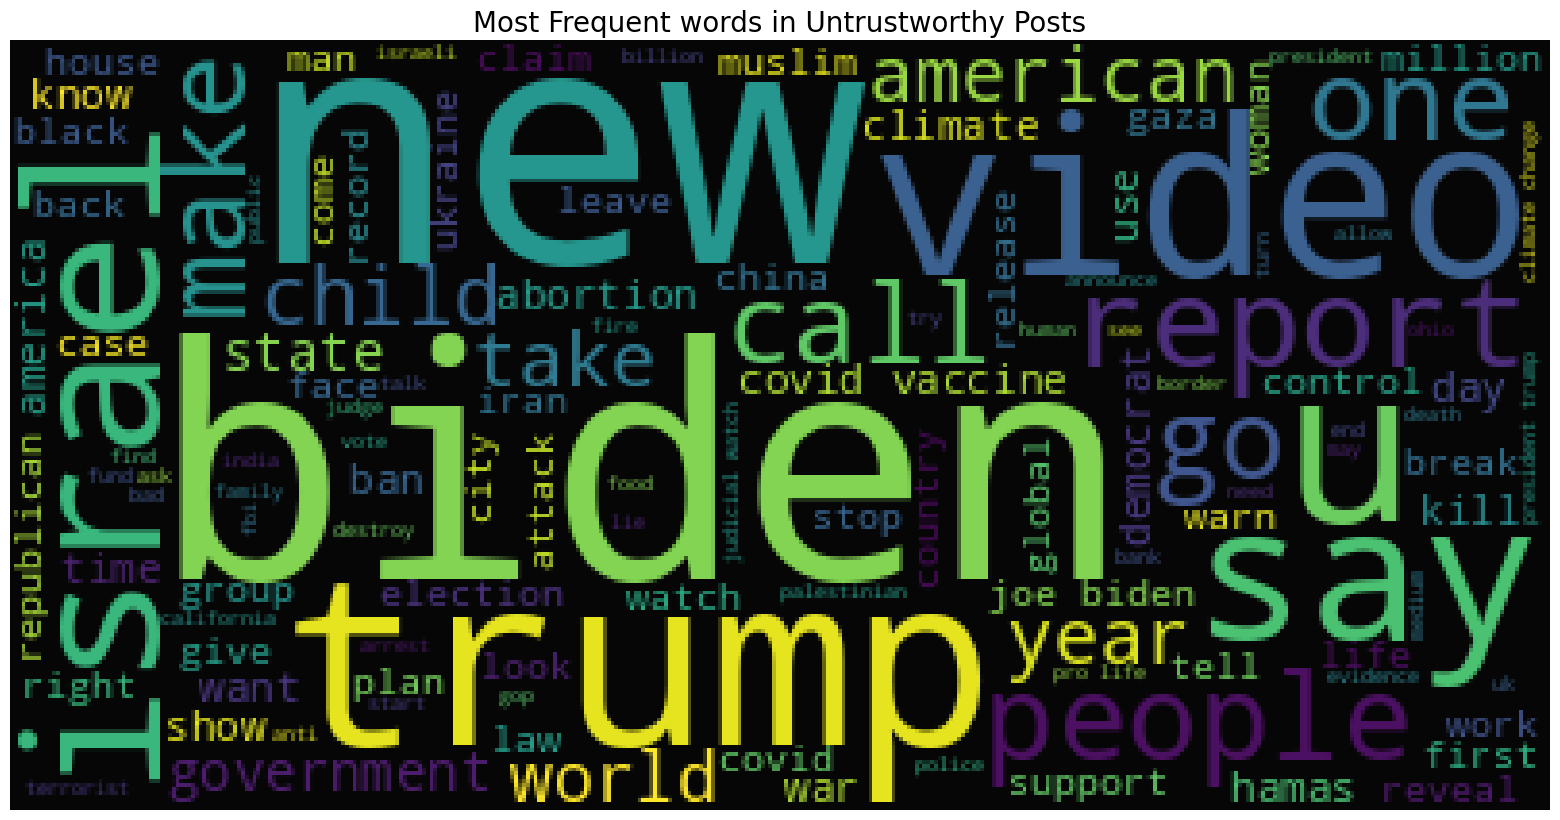

In [70]:
sample_titles = train_df[train_df['trustworthiness'] == 0].sample(n=6000)['title'].values #random sampling

wc = WordCloud(background_color="black", max_words=2000)
wc.generate(' '.join(sample_titles))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Most Frequent words in Untrustworthy Posts', fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

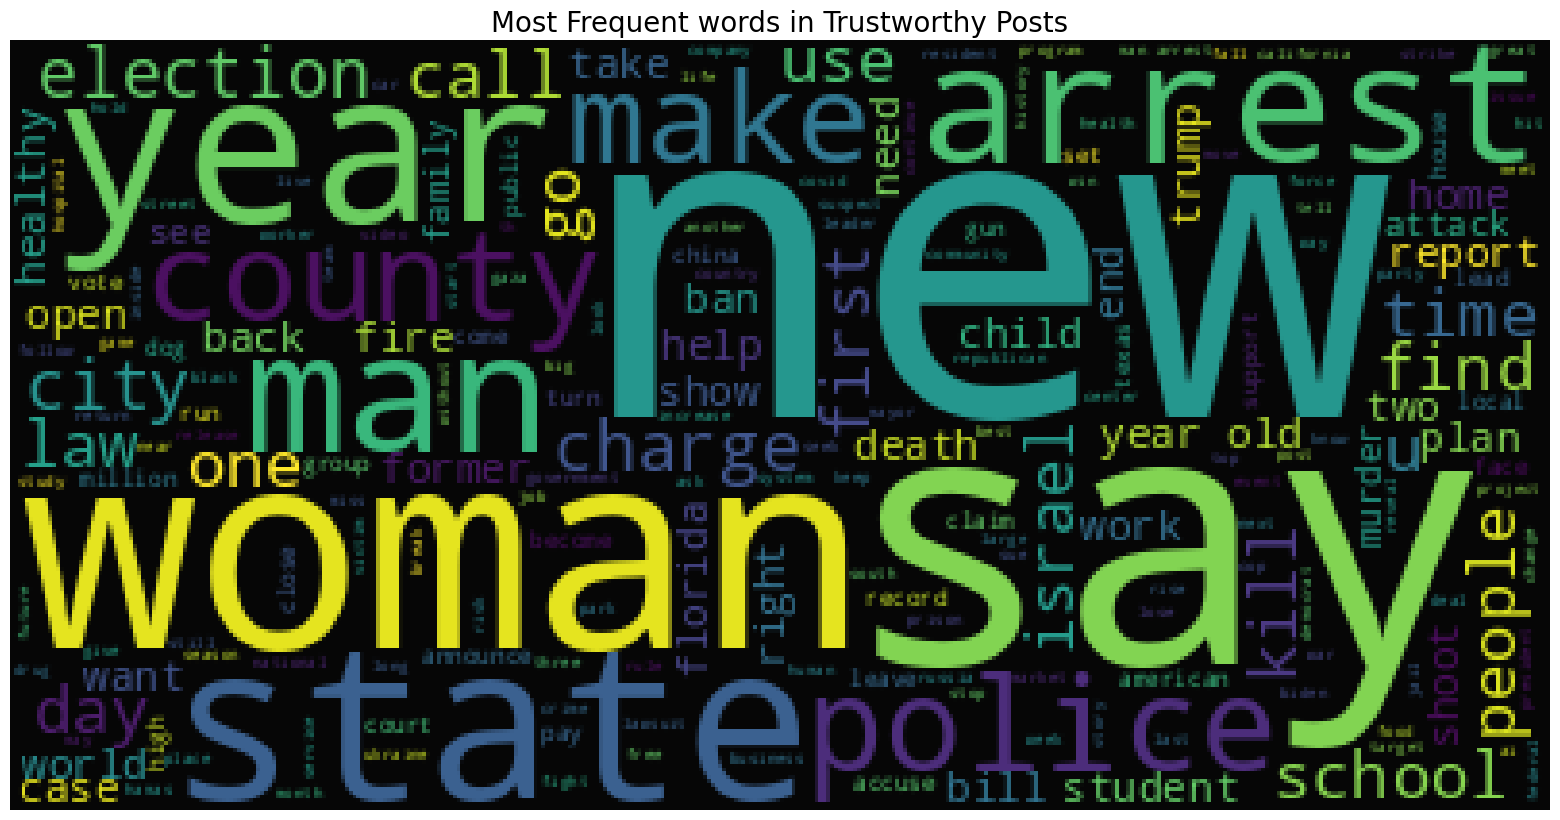

In [71]:
sample_titles = train_df[train_df['trustworthiness'] == 1].sample(n=6000)['title'].values

wc = WordCloud(background_color="black", max_words=2000)
wc.generate(' '.join(sample_titles))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Most Frequent words in Trustworthy Posts', fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

There is not much difference between the 2 groups

*Get Top NGrams*

In [72]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)

    df = pd.DataFrame({'word': words, 'freq': freqs})
    return df

In [73]:
n = 20
unigrams_st = get_top_ngrams(train_df['title'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(train_df['title'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(train_df['title'], (3, 3), stop_words, n)

Text(0.5, 1.0, 'Top 20 Unigrams After Removing Stopwords')

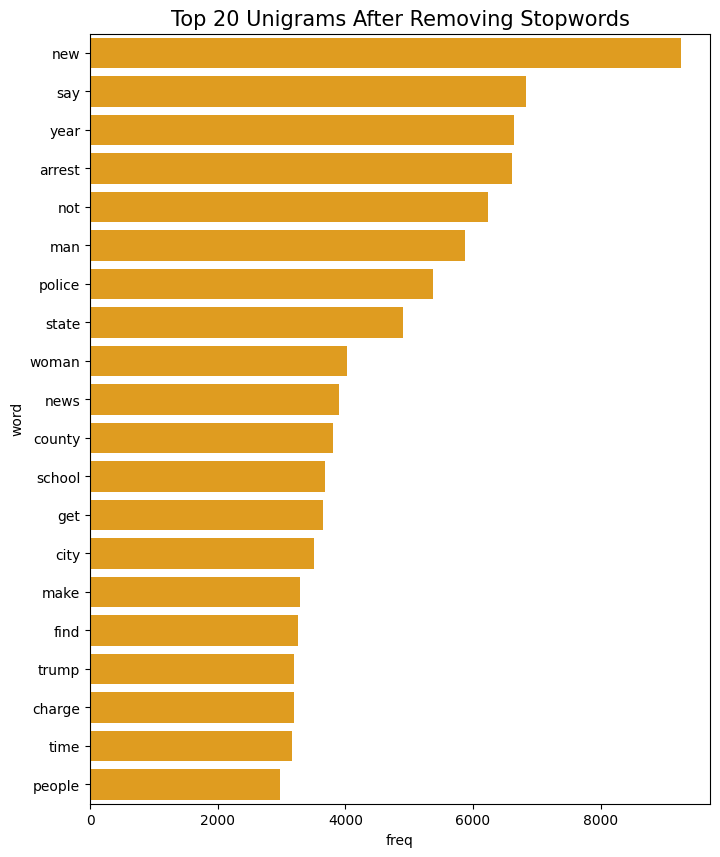

In [74]:
plt.figure(figsize=(8, 10))
sns.barplot(x='freq', y='word', color='orange', data=unigrams_st)
plt.title('Top 20 Unigrams After Removing Stopwords', size=15)

Text(0.5, 1.0, 'Top 20 Bigrams After Removing Stopwords')

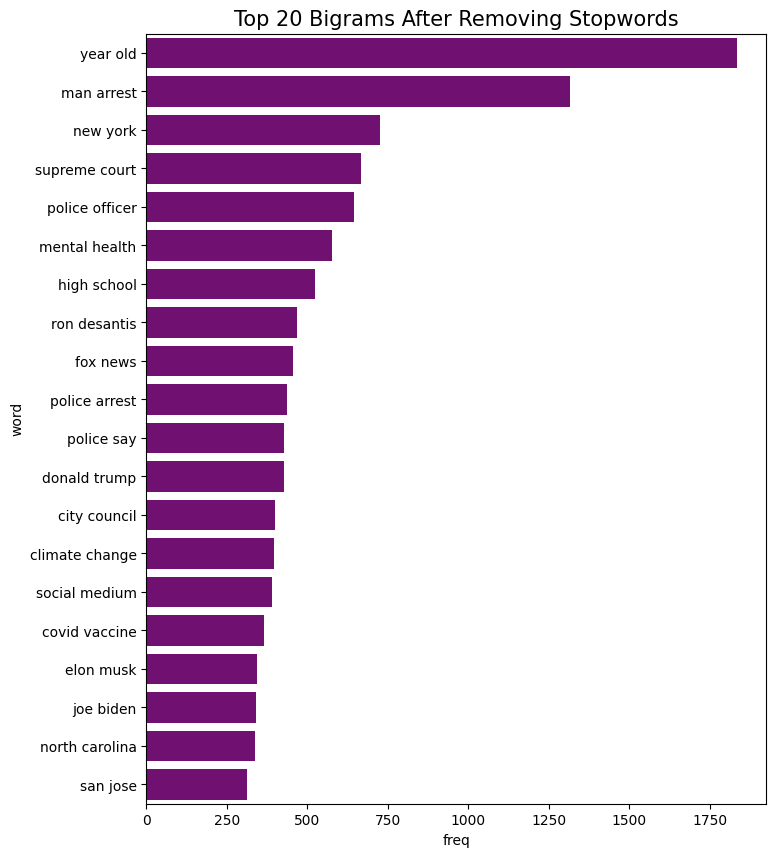

In [75]:
plt.figure(figsize=(8, 10))
sns.barplot(x='freq', y='word', color='purple', data=bigrams_st)
plt.title('Top 20 Bigrams After Removing Stopwords', size=15)

Text(0.5, 1.0, 'Top 20 Trigrams After Removing Stopwords')

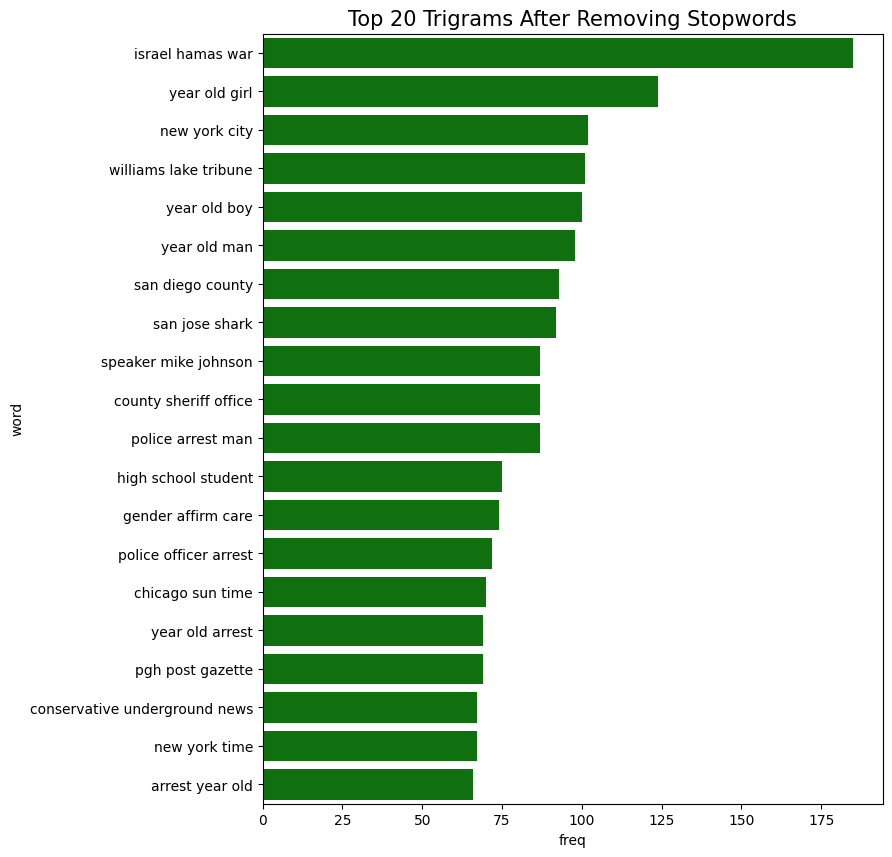

In [76]:
plt.figure(figsize=(8, 10))
sns.barplot(x='freq', y='word', color='green', data=trigrams_st)
plt.title('Top 20 Trigrams After Removing Stopwords', size=15)

In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147516 entries, 63829 to 1651
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   domain           147516 non-null  object 
 1   subreddit        147516 non-null  object 
 2   title            147516 non-null  object 
 3   trustworthiness  147516 non-null  int64  
 4   word_count       147516 non-null  int64  
 5   title_len        147516 non-null  int64  
 6   language         147516 non-null  float64
 7   misspelled       147516 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 10.1+ MB


There are no new empty rows in title column after cleaning

#### *Domain and Subreddit*

*Remove all domain extensions*

In [78]:
train_df['domain'] = train_df['domain'].apply(lambda x: ''.join(w for w in x.split('.')[0]))

In [79]:
train_df.head()

,domain,subreddit,title,trustworthiness,word_count,title_len,language,misspelled
63829,thequint,bjpmeme,not fool violence kuki woman manipur allow happen,1,13,79,0.777,"{manipur, kuki}"
127845,sheknows,DlistedRoyals,bower say title give sussex kid,1,11,64,0.897,"{sussex, shouldn}"
4488,amgreatness,Conservative,biden regime give christian family flee german...,1,15,98,0.805,{biden}
138672,abc11,raleigh,agree raleigh rd best water world,1,11,53,0.573,"{rd, raleigh}"
23992,usasupreme,conspiracy,police breach house maine shooter report nothi...,0,30,171,1.000,"{fbi, maine}"


In [80]:
#check for any new nans
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147516 entries, 63829 to 1651
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   domain           147516 non-null  object 
 1   subreddit        147516 non-null  object 
 2   title            147516 non-null  object 
 3   trustworthiness  147516 non-null  int64  
 4   word_count       147516 non-null  int64  
 5   title_len        147516 non-null  int64  
 6   language         147516 non-null  float64
 7   misspelled       147516 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 10.1+ MB


Text(0.5, 1.0, 'Top 20 Domains')

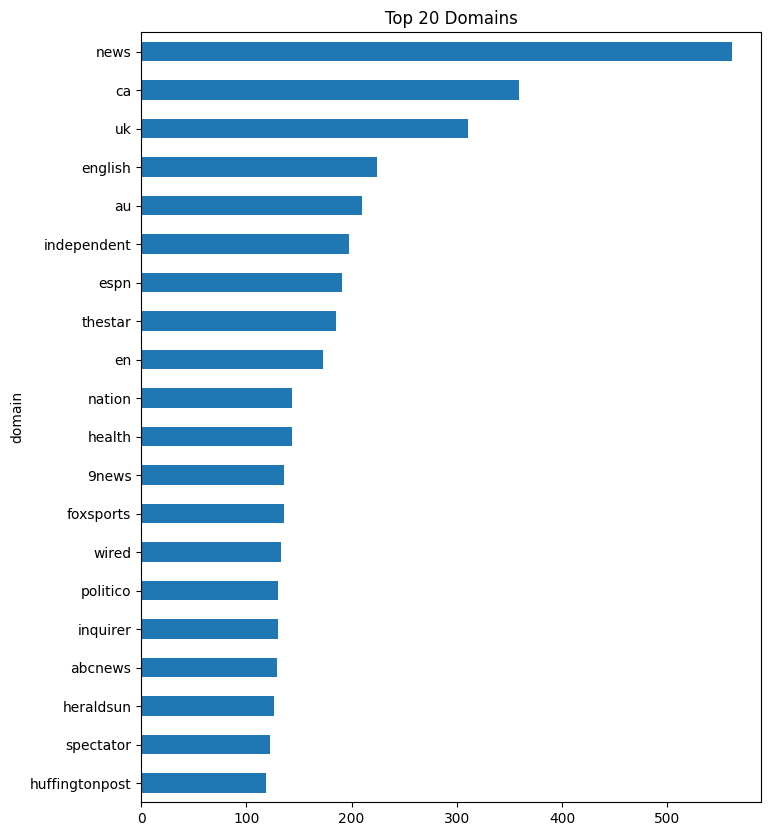

In [81]:
plt.figure(figsize=(8, 10))
train_df.domain.value_counts()[:20].sort_values().plot(kind='barh')
plt.title('Top 20 Domains', size=12)

Text(0.5, 1.0, 'Top 20 Sub Reddits')

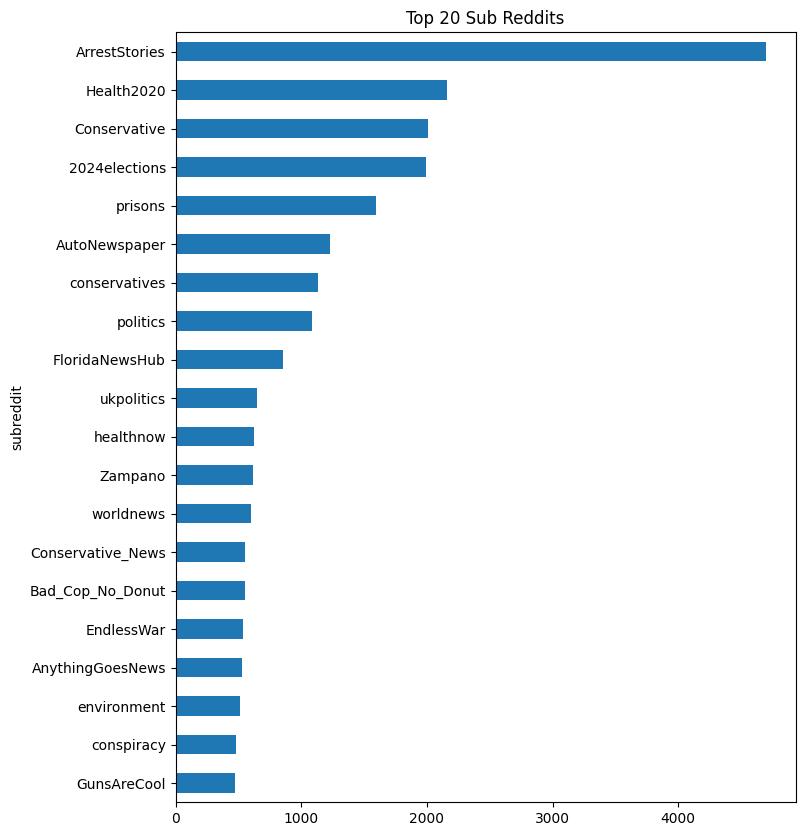

In [82]:
plt.figure(figsize=(8, 10))
train_df.subreddit.value_counts()[:20].sort_values().plot(kind='barh')
plt.title('Top 20 Sub Reddits', size=12)